In [34]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pecanpy

In [35]:
%matplotlib inline
plt.style.use("ggplot")

In [2]:
pd.__version__

'0.22.0'

In [3]:
# define KAPSARC user credentials
USER_NAME = ???
PASSWORD = ???

# create the engine that connects to the database...
local_engine = pecanpy.create_local_engine(USER_NAME, PASSWORD)

In [4]:
with local_engine.connect() as con:
    metadata_df = pecanpy.read_metadata_table(con, "public")

In [5]:
metadata_df.head()

,active_record,building_type,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,city,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
dataid,,,,,,,,,,,,,,,,,,,,,
5545,True,Single-Family Home,False,True,True,False,False,CCET - Control,None,Austin,...,True,False,False,False,False,False,False,False,False,False
9160,True,Single-Family Home,False,True,True,False,False,CCET - Portal Only,None,Austin,...,True,False,False,False,False,False,False,False,False,False
2199,True,Single-Family Home,False,False,True,False,False,CCET - Portal Only,None,Austin,...,True,False,False,False,False,False,False,False,False,False
5026,True,Single-Family Home,False,False,True,False,False,None,None,Austin,...,True,False,False,False,False,False,False,False,False,False
7335,True,Single-Family Home,False,False,True,False,False,None,None,Austin,...,False,False,False,False,False,False,False,False,False,False


In [13]:
time = datetime.datetime.now()
seed = time.hour * 10000 + time.minute * 100 + time.second
prng = np.random.RandomState(seed)
with_egauge_data = metadata_df[metadata_df.egauge_min_time.notnull()]
random_household = with_egauge_data.sample(n=1, random_state=prng)

In [29]:
# how much available data possibly exists?
start_time = random_household.iloc[0].egauge_min_time
end_time = random_household.iloc[0].egauge_max_time
time_delta = end_time - start_time

In [30]:
time_delta

Timedelta('635 days 12:59:00')

In [15]:
with local_engine.connect() as local_con:

    # extract the required parameters
    dataid = random_household.iloc[0].name
    start_time = random_household.iloc[0].egauge_min_time
    end_time = random_household.iloc[0].egauge_max_time

    usage_df = pecanpy.read_electricity_egauge_minutes_query(local_con, "public", "all", dataid, start_time, end_time)

In [16]:
usage_df.shape

(748559, 68)

In [17]:
usage_df.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localminute,,,,,,,,,,,,,,,,,,,,,
2014-02-07 18:00:00-06:00,7764,0.464,0.0,None,None,None,None,None,None,None,...,0.115,None,None,None,None,None,None,0.0,None,None
2014-02-07 18:01:00-06:00,7764,0.469,0.0,None,None,None,None,None,None,None,...,0.115,None,None,None,None,None,None,0.0,None,None
2014-02-07 18:02:00-06:00,7764,0.475,0.0,None,None,None,None,None,None,None,...,0.114,None,None,None,None,None,None,0.0,None,None
2014-02-07 18:03:00-06:00,7764,0.462,0.0,None,None,None,None,None,None,None,...,0.113,None,None,None,None,None,None,0.0,None,None
2014-02-07 18:04:00-06:00,7764,0.461,0.0,None,None,None,None,None,None,None,...,0.113,None,None,None,None,None,None,0.0,None,None


In [18]:
usage_df.tail()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localminute,,,,,,,,,,,,,,,,,,,,,
2015-11-05 06:54:00-06:00,7764,2.311,0.958,None,None,None,None,None,None,None,...,0.0,None,None,None,None,None,None,0.694,None,None
2015-11-05 06:55:00-06:00,7764,1.607,0.960,None,None,None,None,None,None,None,...,0.0,None,None,None,None,None,None,0.000,None,None
2015-11-05 06:56:00-06:00,7764,1.609,0.960,None,None,None,None,None,None,None,...,0.0,None,None,None,None,None,None,0.000,None,None
2015-11-05 06:57:00-06:00,7764,1.617,0.960,None,None,None,None,None,None,None,...,0.0,None,None,None,None,None,None,0.000,None,None
2015-11-05 06:58:00-06:00,7764,1.615,0.961,None,None,None,None,None,None,None,...,0.0,None,None,None,None,None,None,0.000,None,None


In [31]:
# if gen is not null, then household is a prosumer!
usage_df[["grid", "use", "gen"]].head()

,grid,use,gen
localminute,,,
2014-02-07 18:00:00-06:00,0.464,0.464,None
2014-02-07 18:01:00-06:00,0.469,0.469,None
2014-02-07 18:02:00-06:00,0.475,0.475,None
2014-02-07 18:03:00-06:00,0.462,0.462,None
2014-02-07 18:04:00-06:00,0.461,0.461,None


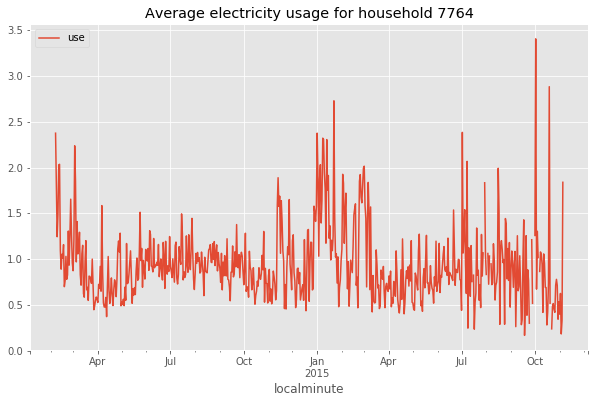

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
usage_df.use.resample("D").mean().plot(ax=ax, label="use")
ax.set_title("Average electricity use for household {}".format(dataid))
ax.legend()
plt.show()